# Upload Apartment Data as CSV

In [ ]:
from google.colab import files

print('Upload Apartment Data CSV')
file_dict = files.upload()

# Get the uploaded file name
uploaded_csv = list(file_dict.keys())[0]  # Extract the first

Upload Apartment Data CSV


Saving Apartment Data Collection - Sheet1.csv to Apartment Data Collection - Sheet1.csv


# Import Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(uploaded_csv)

# Display the first few rows of the dataset
data.head()

,Apartment Name,Miles from BYU,Has Bus,Has Pool,Has Hottub,Allows Pets,Apartment sq ft.,Bedrooms per apt,Bathrooms per apt,People per apt,People per room,"Reviews (google, eg 3.4 / 5)",Price per month (OUTPUT FEATURE)
0,Blueridge 3x2 shared,0.6,True,True,False,False,916.0,3,2,6,2,3.4,$425.00
1,Blueridge 3x2 private,0.6,True,True,False,False,916.0,3,2,3,1,3.4,$670.00
2,Blueridge 2x2 shared,0.6,True,True,False,False,916.0,2,2,4,2,3.4,$435.00
3,Blueridge 2x2 private,0.6,True,True,False,False,916.0,2,2,2,1,3.4,$680.00
4,Blueridge 1x1 private,0.6,True,True,False,False,916.0,1,1,1,1,3.4,"$1,005.00"


# Remove any Missing Values with Mean for Numerical Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# Data preprocessing
# Remove the "Apartment Name" as it's likely not useful for prediction
data = data.drop(columns=["Apartment Name"])

# Convert categorical features (e.g., True/False) to numeric
for col in ["Has Bus", "Has Pool", "Has Hottub", "Allows Pets"]:
    data[col] = data[col].astype(int)

# Convert "Price per month" to numeric by removing the '$' sign and commas
data["Price per month (OUTPUT FEATURE)"] = (
    data["Price per month (OUTPUT FEATURE)"]
    .replace("[$,]", "", regex=True)
    .astype(float)
)

# Split features (X) and target (y)
X = data.drop(columns=["Price per month (OUTPUT FEATURE)"])
y = data["Price per month (OUTPUT FEATURE)"]

# Fill missing values with the mean for numeric columns
X = X.fillna(X.mean())

# Verify no more NaN values
assert not X.isnull().any().any(), "There are still NaN values in the data!"

# Split the data (to ensure consistent processing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Train Initial Attempts

Lasso Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso = Lasso()

lasso.fit(X_train, y_train)


y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train MSE: 44424.7266
Test MSE: 84254.2666
Train R²: 0.8528
Test R²: 0.7761


Decison Tree Model

In [ ]:
# Split the data (to ensure consistent processing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate again
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

299.65518645474964

MLP

In [ ]:

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlp = MLPRegressor()
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train MSE: 349600.0090
Test MSE: 347166.0353
Train R²: -0.1585
Test R²: 0.0773


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 400869.27692307695


Bayesian Ridge

In [ ]:
from sklearn.linear_model import BayesianRidge

bayes_ridge = BayesianRidge()

bayes_ridge.fit(X_train, y_train)

y_train_pred = bayes_ridge.predict(X_train)
y_test_pred = bayes_ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train MSE: 301761.0989
Test MSE: 383649.1790
Train R²: 0.0000
Test R²: -0.0196


#Improved Attempts

## Try PCA and Normalization on the data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Try new data on all the old methods; first normalization, then PCA

Lasso

In [ ]:
# Try with normalized data
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Results with normalized data:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Try with PCA transformed data
lasso = Lasso()
lasso.fit(X_train_pca, y_train)

y_train_pred = lasso.predict(X_train_pca)
y_test_pred = lasso.predict(X_test_pca)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with PCA:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Results with normalized data:
Train MSE: 44406.2156
Test MSE: 83601.8079
Train R²: 0.8528
Test R²: 0.7778

Results with PCA:
Train MSE: 45133.8659
Test MSE: 79060.7583
Train R²: 0.8504
Test R²: 0.7899


Decison Tree

In [ ]:
# Try with normalized data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Results with normalized data:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Try with PCA transformed data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_pca, y_train)

y_train_pred = dt.predict(X_train_pca)
y_test_pred = dt.predict(X_test_pca)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with PCA:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Results with normalized data:
Train MSE: 83.1635
Test MSE: 89793.2308
Train R²: 0.9997
Test R²: 0.7614

Results with PCA:
Train MSE: 83.1635
Test MSE: 172246.6154
Train R²: 0.9997
Test R²: 0.5422


MLP

In [ ]:
mlp = MLPRegressor()
mlp.fit(X_train_scaled, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

mlp = MLPRegressor()
mlp.fit(X_train_pca, y_train)

y_train_pred = mlp.predict(X_train_pca)
y_test_pred = mlp.predict(X_test_pca)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train MSE: 3343510.1839
Test MSE: 1318915.6263
Train R²: -10.0800
Test R²: -2.5052


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train MSE: 1093148.8190
Test MSE: 1326774.3097
Train R²: -2.6226
Test R²: -2.5261


KNN

In [ ]:
# Try with normalized data
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Results with normalized data:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Try with PCA transformed data
knn = KNeighborsRegressor()
knn.fit(X_train_pca, y_train)

y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with PCA:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Results with normalized data:
Train MSE: 39677.7485
Test MSE: 67920.2308
Train R²: 0.8685
Test R²: 0.8195

Results with PCA:
Train MSE: 39677.7485
Test MSE: 72506.7138
Train R²: 0.8685
Test R²: 0.8073


BaysienRidge

In [ ]:
# Try with normalized data
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_scaled, y_train)

y_train_pred = bayes_ridge.predict(X_train_scaled)
y_test_pred = bayes_ridge.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Results with normalized data:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

# Try with PCA transformed data
bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train_pca, y_train)

y_train_pred = bayes_ridge.predict(X_train_pca)
y_test_pred = bayes_ridge.predict(X_test_pca)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with PCA:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Results with normalized data:
Train MSE: 45689.1485
Test MSE: 81998.8811
Train R²: 0.8486
Test R²: 0.7821

Results with PCA:
Train MSE: 46072.5847
Test MSE: 80013.3590
Train R²: 0.8473
Test R²: 0.7874


## Other Improvemnts for each model

Delta Rule (Different loss method)

In [ ]:
class DeltaRuleRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Make predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Update weights and bias
            delta_w = self.learning_rate * np.dot(X.T, (y - y_pred)) / n_samples
            delta_b = self.learning_rate * np.mean(y - y_pred)

            self.weights += delta_w
            self.bias += delta_b

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train and evaluate the model
delta_rule = DeltaRuleRegressor(learning_rate=0.01, n_iterations=1000)
delta_rule.fit(X_train_scaled, y_train)

y_train_pred = delta_rule.predict(X_train_scaled)
y_test_pred = delta_rule.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Delta Rule Results:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Delta Rule Results:
Train MSE: 44881.9935
Test MSE: 81501.1360
Train R²: 0.8513
Test R²: 0.7834


Decsion Tree Tweaks

In [ ]:
# Grid search for best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error']
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Use best model
best_dt = grid_search.best_estimator_
y_train_pred = best_dt.predict(X_train_scaled)
y_test_pred = best_dt.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with optimized Decision Tree:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Best parameters: {'criterion': 'absolute_error', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

Results with optimized Decision Tree:
Train MSE: 8811.7981
Test MSE: 131456.0192
Train R²: 0.9708
Test R²: 0.6506


MLP (Hyper Paramter Selections)

In [ ]:
clf = MLPRegressor(max_iter=500, random_state=42)
parameters = {'learning_rate_init':( .001, .01, .015,.02, .005),
              'momentum':( .5, .75, .9, .95, .99)}
grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {test_mae}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'learning_rate_init': 0.015, 'momentum': 0.5}
Best Score: 193.06509406425
Test MAE: 236.38403060949545


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN

In [ ]:
# Grid search for best parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Use best model
best_knn = grid_search.best_estimator_
y_train_pred = best_knn.predict(X_train_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with optimized KNN:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

Results with optimized KNN:
Train MSE: 83.1635
Test MSE: 62897.9942
Train R²: 0.9997
Test R²: 0.8328


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Baysian Ridge

In [ ]:
# Grid search for best parameters
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
}

br = BayesianRidge()
grid_search = GridSearchCV(br, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Use best model
best_br = grid_search.best_estimator_
y_train_pred = best_br.predict(X_train_scaled)
y_test_pred = best_br.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nResults with optimized Bayesian Ridge:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Best parameters: {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001}

Results with optimized Bayesian Ridge:
Train MSE: 45689.1391
Test MSE: 81998.8762
Train R²: 0.8486
Test R²: 0.7821


# EDA

In [ ]:
# Basic Data Information
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

# Basic statistical summary
print("\nNumerical Columns Summary:")
print(data.describe())

Dataset Shape: (65, 12)

Data Types:
 Miles from BYU                      float64
Has Bus                               int64
Has Pool                              int64
Has Hottub                            int64
Allows Pets                           int64
Apartment sq ft.                    float64
Bedrooms per apt                      int64
Bathrooms per apt                     int64
People per apt                        int64
People per room                       int64
Reviews (google, eg 3.4 / 5)        float64
Price per month (OUTPUT FEATURE)    float64
dtype: object

Missing Values:
 Miles from BYU                      0
Has Bus                             0
Has Pool                            0
Has Hottub                          0
Allows Pets                         0
Apartment sq ft.                    6
Bedrooms per apt                    0
Bathrooms per apt                   0
People per apt                      0
People per room                     0
Reviews (google, eg 3.

## Price Distribution Analysis

Data types of columns:
Miles from BYU                      float64
Has Bus                               int64
Has Pool                              int64
Has Hottub                            int64
Allows Pets                           int64
Apartment sq ft.                    float64
Bedrooms per apt                      int64
Bathrooms per apt                     int64
People per apt                        int64
People per room                       int64
Reviews (google, eg 3.4 / 5)        float64
Price per month (OUTPUT FEATURE)    float64
dtype: object

Data shape: (65, 13)

Missing values:
 Miles from BYU                      0
Has Bus                             0
Has Pool                            0
Has Hottub                          0
Allows Pets                         0
Apartment sq ft.                    6
Bedrooms per apt                    0
Bathrooms per apt                   0
People per apt                      0
People per room                     0
Reviews (google

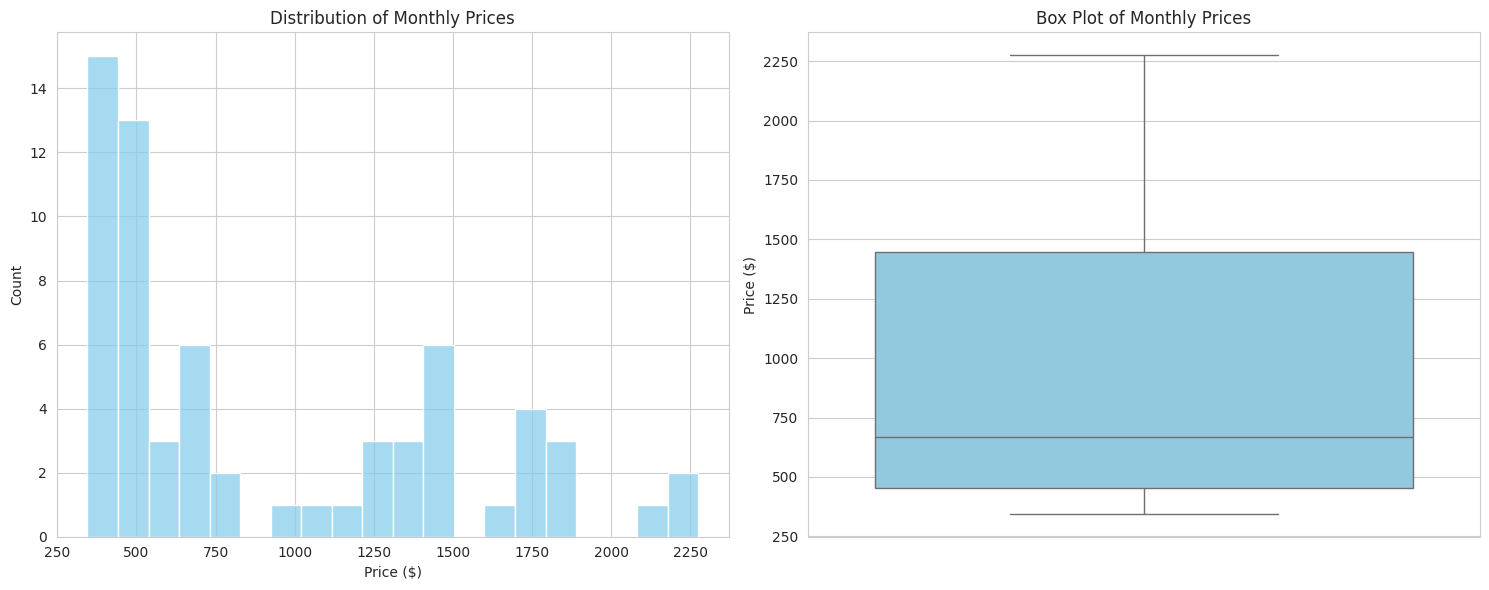

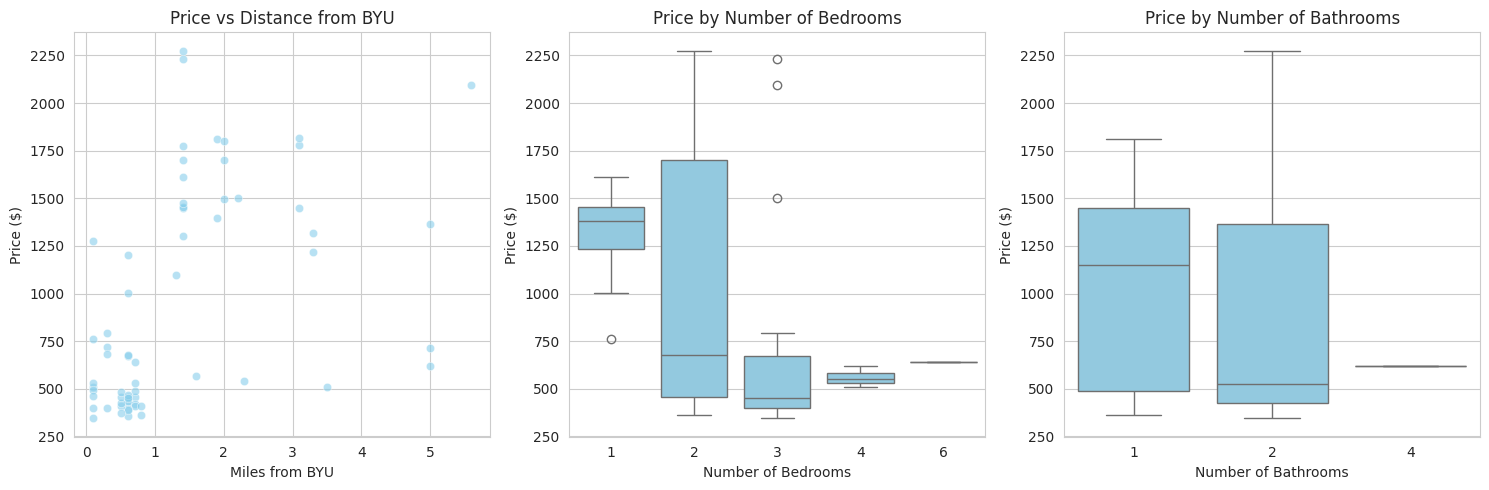

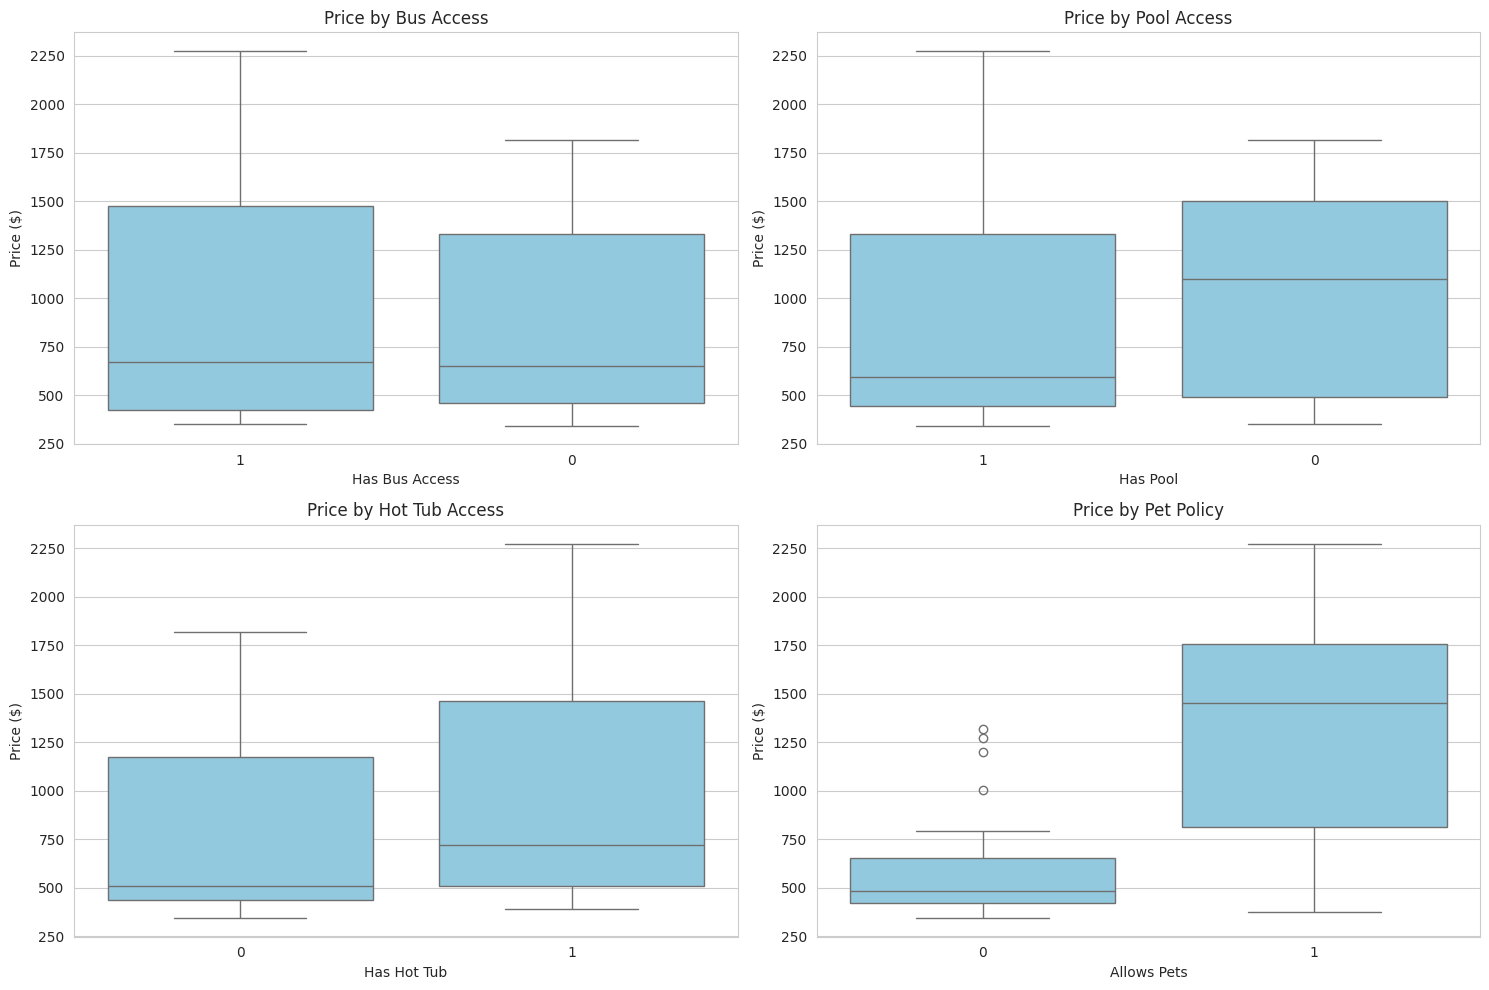


Correlations with Price:
Miles from BYU: 0.488
Apartment sq ft.: 0.059
Bedrooms per apt: -0.411
Bathrooms per apt: -0.141
People per apt: -0.716
Reviews (google, eg 3.4 / 5): 0.691

Price Statistics by Number of Bedrooms:
                  count     mean     std    min     max
Bedrooms per apt                                       
1                    14  1310.79  227.19  760.0  1610.0
2                    25   988.24  639.36  365.0  2275.0
3                    21   680.90  553.13  345.0  2229.0
4                     4   559.00   46.90  509.0   619.0
6                     1   639.00     NaN  639.0   639.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure seaborn is imported before setting style
sns.set_style("whitegrid")

# First, let's check the data types
print("Data types of columns:")
print(data.dtypes)

# Convert price column using a different approach
def clean_price(price):
    if isinstance(price, str):
        return float(price.replace('$', '').replace(',', ''))
    return price

data['Price_Numeric'] = data['Price per month (OUTPUT FEATURE)'].apply(clean_price)
prices = data['Price_Numeric']

# Data Quality Check
print("\nData shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nPrice column stats:")
print(prices.describe())

# Create visualizations
# 1. Basic Price Distribution Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(data=prices, bins=20, color='skyblue', ax=ax1)
ax1.set_title('Distribution of Monthly Prices')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Count')

# Boxplot
sns.boxplot(y=prices, color='skyblue', ax=ax2)
ax2.set_title('Box Plot of Monthly Prices')
ax2.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# 2. Feature Relationships
plt.figure(figsize=(15, 5))

# Create three subplots
plt.subplot(131)
sns.scatterplot(data=data, x='Miles from BYU', y='Price_Numeric', color='skyblue', alpha=0.6)
plt.title('Price vs Distance from BYU')
plt.xlabel('Miles from BYU')
plt.ylabel('Price ($)')

plt.subplot(132)
sns.boxplot(data=data, x='Bedrooms per apt', y='Price_Numeric', color='skyblue')
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')

plt.subplot(133)
sns.boxplot(data=data, x='Bathrooms per apt', y='Price_Numeric', color='skyblue')
plt.title('Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

# 3. Amenities Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Bus Access
sns.boxplot(data=data, x=data['Has Bus'].astype(str), y='Price_Numeric', ax=ax1, color='skyblue')
ax1.set_title('Price by Bus Access')
ax1.set_xlabel('Has Bus Access')
ax1.set_ylabel('Price ($)')

# Pool Access
sns.boxplot(data=data, x=data['Has Pool'].astype(str), y='Price_Numeric', ax=ax2, color='skyblue')
ax2.set_title('Price by Pool Access')
ax2.set_xlabel('Has Pool')
ax2.set_ylabel('Price ($)')

# Hot Tub Access
sns.boxplot(data=data, x=data['Has Hottub'].astype(str), y='Price_Numeric', ax=ax3, color='skyblue')
ax3.set_title('Price by Hot Tub Access')
ax3.set_xlabel('Has Hot Tub')
ax3.set_ylabel('Price ($)')

# Pet Policy
sns.boxplot(data=data, x=data['Allows Pets'].astype(str), y='Price_Numeric', ax=ax4, color='skyblue')
ax4.set_title('Price by Pet Policy')
ax4.set_xlabel('Allows Pets')
ax4.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Print correlation analysis
print("\nCorrelations with Price:")
numerical_cols = ['Miles from BYU', 'Apartment sq ft.', 'Bedrooms per apt',
                 'Bathrooms per apt', 'People per apt', 'Reviews (google, eg 3.4 / 5)']

for col in numerical_cols:
    if col in data.columns and not data[col].isnull().all():
        correlation = data[col].corr(data['Price_Numeric'])
        print(f"{col}: {correlation:.3f}")

# Summary statistics by bedroom count
print("\nPrice Statistics by Number of Bedrooms:")
bedroom_stats = data.groupby('Bedrooms per apt')['Price_Numeric'].agg(['count', 'mean', 'std', 'min', 'max'])
print(bedroom_stats.round(2))

## Correlations Between Numerical Features

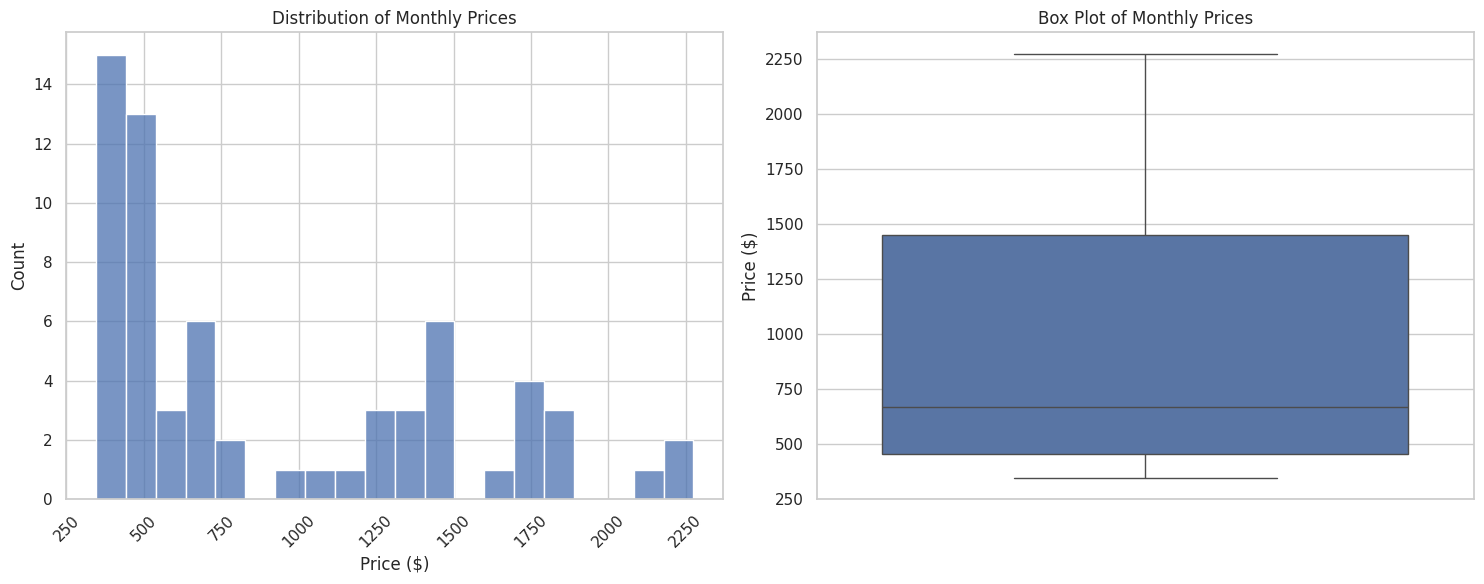


Price Statistics:
Mean Price: $926.63
Median Price: $670.00
Standard Deviation: $568.16
Minimum Price: $345.00
Maximum Price: $2275.00

Price Distribution by Quartile:
25th percentile: $455.00
50th percentile: $670.00
75th percentile: $1449.00

Number of apartments in price ranges:
Price per month (OUTPUT FEATURE)
$0-500        24
$501-1000     15
$1001-1500    15
$1501-2000     8
$2000+         3
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set seaborn style directly
sns.set_theme(style="whitegrid")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Convert prices to numeric values safely
def convert_price(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return float(x)

# Apply safe conversion
prices = data['Price per month (OUTPUT FEATURE)'].map(convert_price)

# Histogram plot
sns.histplot(data=prices, bins=20, ax=ax1)
ax1.set_title('Distribution of Monthly Prices')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Box plot
sns.boxplot(y=prices, ax=ax2)
ax2.set_title('Box Plot of Monthly Prices')
ax2.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nPrice Statistics:")
print(f"Mean Price: ${prices.mean():.2f}")
print(f"Median Price: ${prices.median():.2f}")
print(f"Standard Deviation: ${prices.std():.2f}")
print(f"Minimum Price: ${prices.min():.2f}")
print(f"Maximum Price: ${prices.max():.2f}")

# Additional analysis
print("\nPrice Distribution by Quartile:")
quartiles = np.percentile(prices, [25, 50, 75])
print(f"25th percentile: ${quartiles[0]:.2f}")
print(f"50th percentile: ${quartiles[1]:.2f}")
print(f"75th percentile: ${quartiles[2]:.2f}")

# Print number of apartments in different price ranges
print("\nNumber of apartments in price ranges:")
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['$0-500', '$501-1000', '$1001-1500', '$1501-2000', '$2000+']
price_ranges = pd.cut(prices, bins=bins, labels=labels)
print(price_ranges.value_counts().sort_index())

## Categorical Features

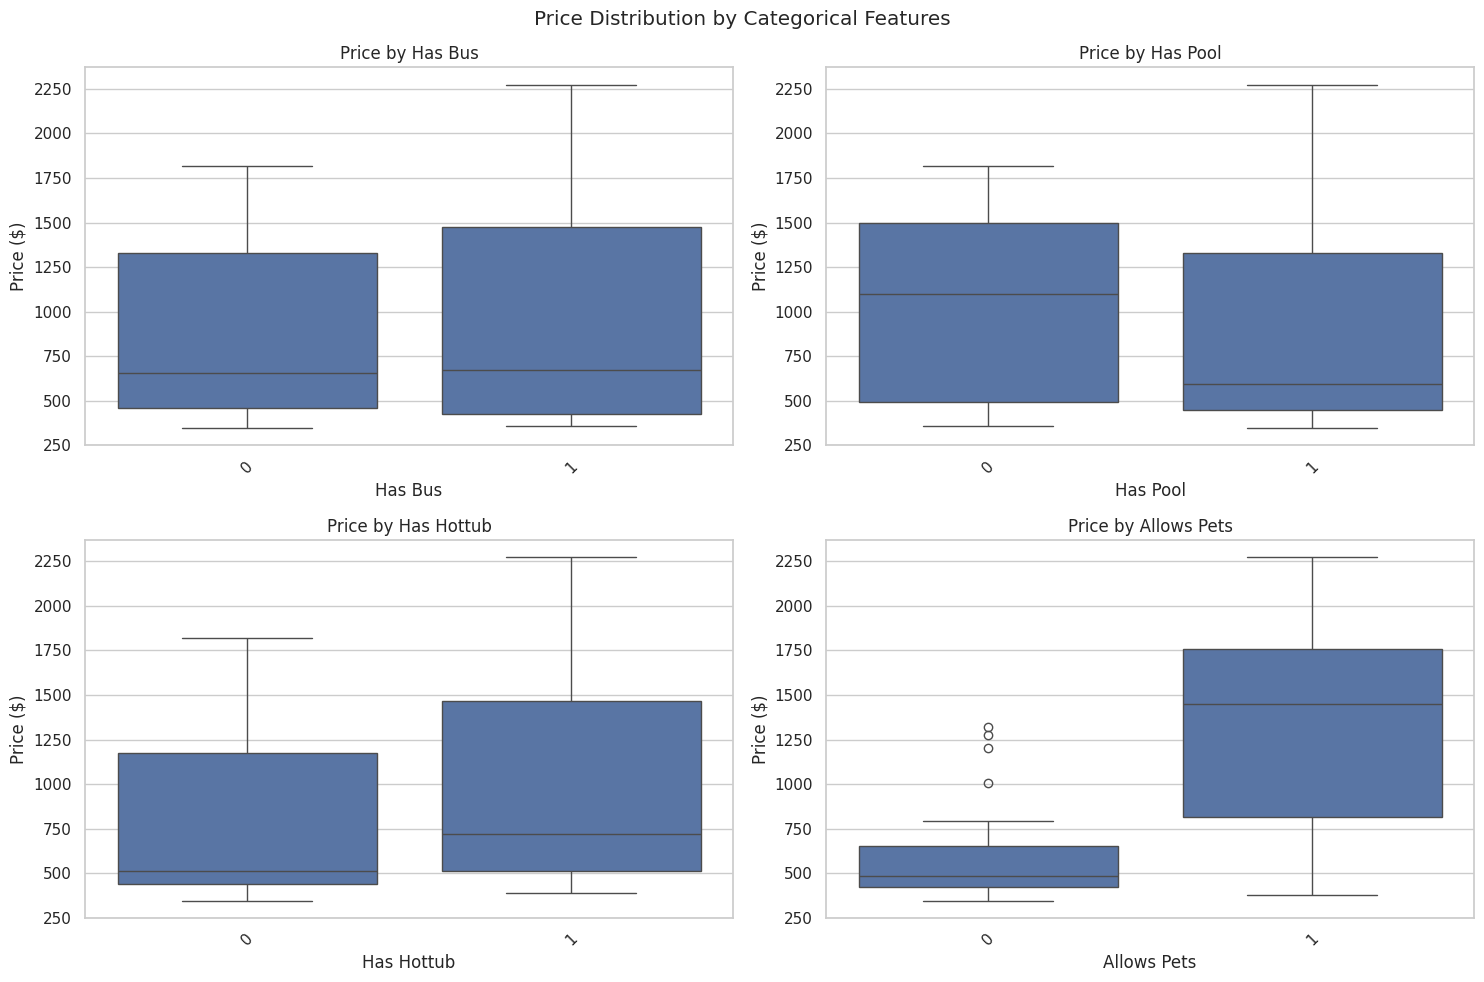

In [ ]:
# Analyze categorical features
categorical_features = ['Has Bus', 'Has Pool', 'Has Hottub', 'Allows Pets']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Price Distribution by Categorical Features')

for idx, feature in enumerate(categorical_features):
    row = idx // 2
    col = idx % 2

    sns.boxplot(x=data[feature], y=data['Price_Numeric'], ax=axes[row, col])
    axes[row, col].set_title(f'Price by {feature}')
    axes[row, col].set_ylabel('Price ($)')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Price and Distance

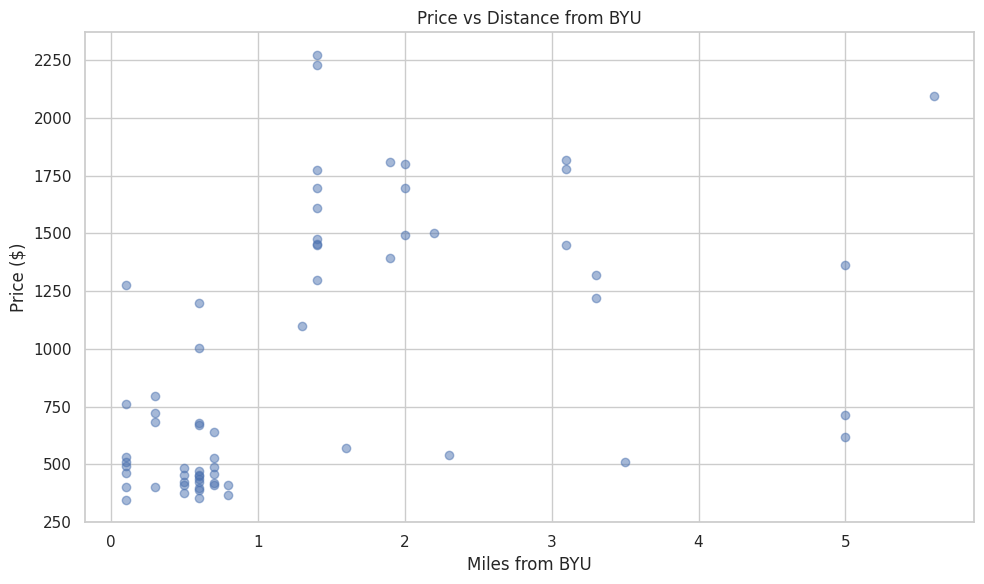

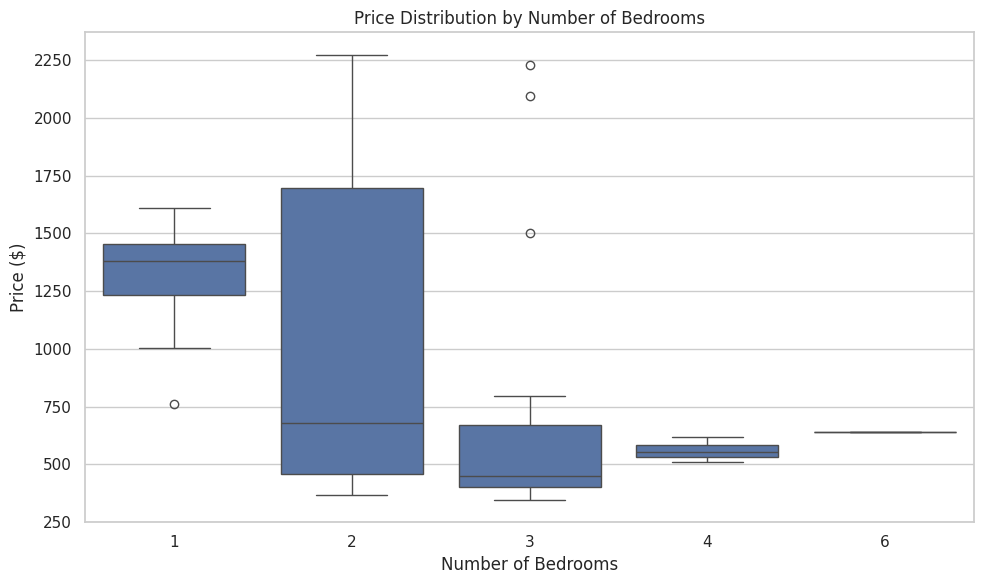

In [ ]:
# Scatter plot of Price vs Distance from BYU
plt.figure(figsize=(10, 6))
plt.scatter(data['Miles from BYU'], data['Price_Numeric'], alpha=0.5)
plt.title('Price vs Distance from BYU')
plt.xlabel('Miles from BYU')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

# Box plot of price by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms per apt', y='Price_Numeric', data=data)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

## Price per Square Foot

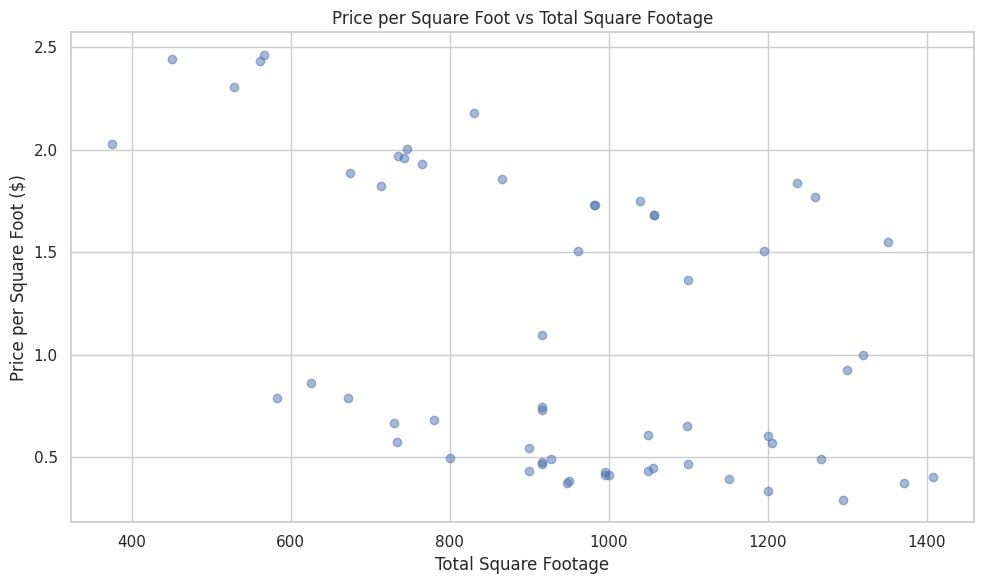

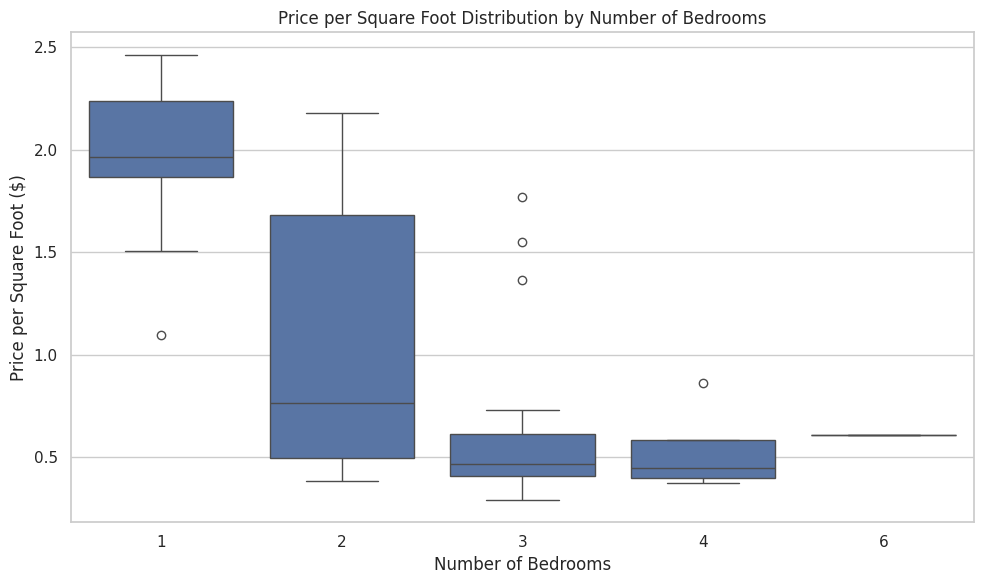

In [ ]:
# Calculate price per square foot
data['Price_per_sqft'] = data['Price_Numeric'] / data['Apartment sq ft.']

# Scatter plot of Price per sqft vs Total sqft
plt.figure(figsize=(10, 6))
plt.scatter(data['Apartment sq ft.'], data['Price_per_sqft'], alpha=0.5)
plt.title('Price per Square Foot vs Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Price per Square Foot ($)')
plt.tight_layout()
plt.show()

# Box plot of price per sqft by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms per apt', y='Price_per_sqft', data=data)
plt.title('Price per Square Foot Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per Square Foot ($)')
plt.tight_layout()
plt.show()

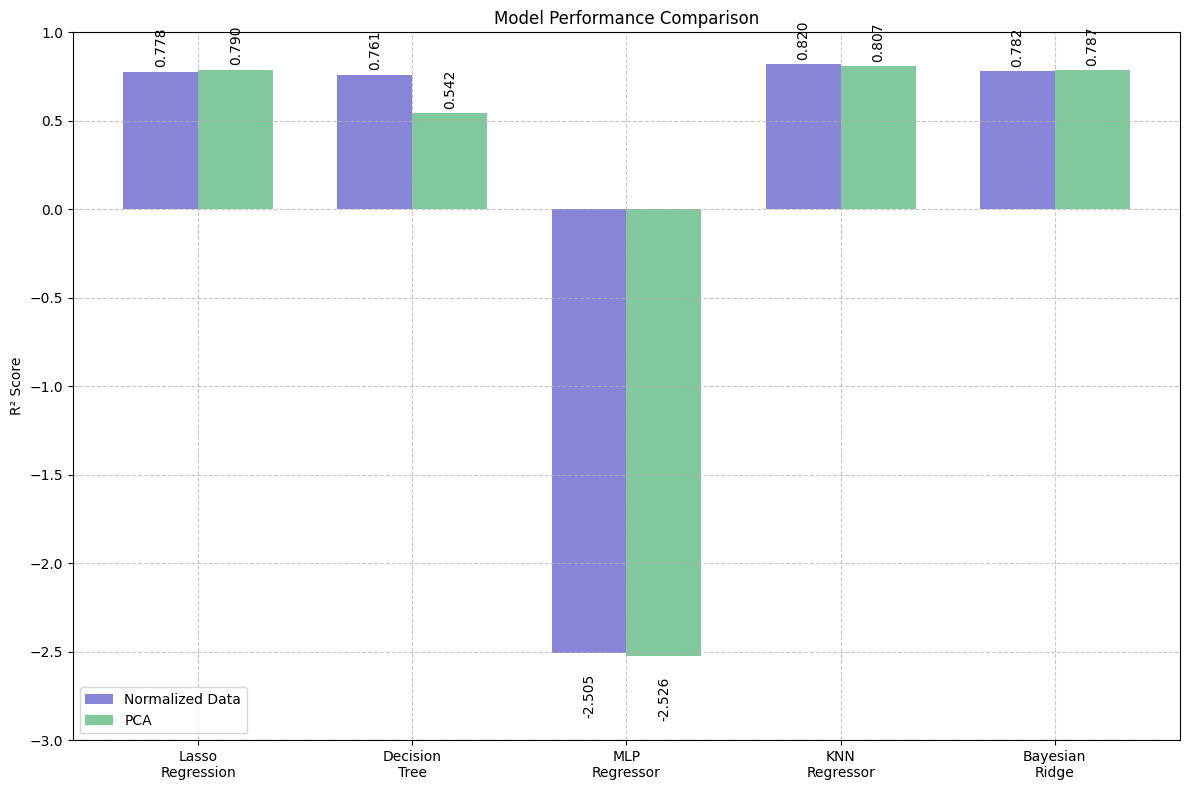

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Lasso\nRegression', 'Decision\nTree', 'MLP\nRegressor', 'KNN\nRegressor', 'Bayesian\nRidge']
normalized_scores = [0.7778, 0.7614, -2.5052, 0.8195, 0.7821]
pca_scores = [0.7899, 0.5422, -2.5261, 0.8073, 0.7874]

# Set up positions
x = np.arange(len(models))
width = 0.35

# Create plot
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, normalized_scores, width, label='Normalized Data', color='#8884d8')
rects2 = ax.bar(x + width/2, pca_scores, width, label='PCA', color='#82ca9d')

# Customize plot
ax.set_ylabel('R² Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limits
ax.set_ylim(-3, 1)
ax.set_yticks(np.arange(-3, 1.1, 0.5))

# Add value labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0, 3 if height >= 0 else -15),
                   textcoords="offset points",
                   ha='center', va='bottom' if height >= 0 else 'top',
                   rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()